# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [8]:
# proportion of callbacks for black-sounding names
sum(data[data.race=='b'].call)/len(data[data.race=='b'])

0.06447638603696099

In [9]:
# proportion of callbacks for white-sounding names
sum(data[data.race=='w'].call)/len(data[data.race=='w'])

0.09650924024640657

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

1.What test is appropriate for this problem? Does CLT apply? <p>

A two proportion z-test that assumes there is no difference in the true proportions of the two cases would be appropriate for testing wheter or not there is a difference in the proportions of the two populations in question here(callback rates for white sounding names and black sounding names). The Central limit theorem can apply to this question, as the sample size is easily large enough for it to be true.


2.What are the null and alternate hypotheses? <p> 
The null hypothesis would be that the race implied in the applicants name has no bearing on callback rate for potential employees. The alternative hypothesis would be that  the race implied in the name of an applicant does effect callback rate for potential employees

In [11]:
w = data[data.race=='w']
b = data[data.race=='b']

In [7]:
# Your solution to Q3 here

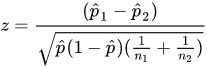

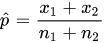

I will start with showing the calculation for the statistical hypothesis test for difference in population distribution(formulas above from wikipedia), then attempt the bootstrap test. The following code cell will calculate all of the required variables and the z-statistic for our data. Before going further, I will establish that I am looking for a 95% confidence interval, which means the critical z-value is 1.96, and I will set alpha at 0.05.

In [26]:
# Defining variables for formula
p1 = np.mean(w.call)
p2 = np.mean(b.call)
x1 = np.sum(w.call)
x2 = np.sum(b.call)
n1 = len(w.call)
n2 = len(b.call)
p_hat = (x1 + x2)/(n1 + n2)

# calculating test statistic
z = (p1 - p2) / np.sqrt(p_hat * (1 - p_hat) * (1/n1 + 1/n2))
z

4.108412235238472

In [32]:
from scipy.special import ndtr as ndtr
p = 1 - ndtr(z)
p

1.9919427047487837e-05

A z-statistic of around 4.11 would lead us to believe in this test that we would want to reject our null hyposthesis that the means of these two proportions is the same, as obtaining this z-statistic is incredibly unlikely. Calculating the p-value from this z-score gives a very small number(around 0.00002), well below our p of 0.05. Now for the bootstrapping approach.

In [55]:
#Creating a loop that will generate a list of difference of means for our data
np.random.seed(118)
mean_diffs = []
for i in range(10000):
    w_mean = np.mean(np.random.choice(w.call, size=len(w.call)))
    b_mean = np.mean(np.random.choice(b.call, size=len(b.call)))
    mean_diffs.append(w_mean - b_mean)

Now that a list of mean differences is created, we can when/if the differences of the mean of these values is ever zero, as that is the null hypothesis.

In [56]:
p = np.sum(np.array(mean_diffs) == 0)/len(mean_diffs)
p

0.0

In [61]:
np.mean(mean_diffs)

0.03208698

In [60]:
np.std(mean_diffs)

0.007759606

In [59]:
np.percentile(np.array(mean_diffs),[2.5, 97.5])

array([0.01642711, 0.04722793])

Looking at the percentile values for the mean differences, it seems that the differences in population proportions here are rarely if ever close to zero, and 0 is not captured withing the 95th percentile range of mean differences that I calculated with my bootstrapping. Also, observing the mean and standard deviations of my mean differences, a mean difference of zero is more than four standard deviations away from the calculated mean of 10000 samples. I'm honetly not sure if this is what I was supposed to do, so I may need to redo this part of this project. (although, looking at the rubric, it doesn't look like both methods need to be used).

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Q4: Looking back at the question of the original problem, which is effectively "Does the race a name seems to present affect the callback rate of resumes?", the answer definitely seems to be yes. The statistical hypothesis test definitely seems to show us there is a clear argument for the two population proportions being different, as well as the bootstrapping approach I used(which may or may not be correct). Looking at the booststrapping values calculated, the callback rate for white sounding names is always higher than the callback rate for black sounding names, and they are never the same, which does present a pretty clear argument to me that there is a significant difference in the callback rates.

Q5: I think it would be naive to assume just from these tests that race/name is the most important factor in predciting callback rate, however, the resumes that were sent for each race/name were identical to each other beyond the race/name being changed, so by nature of how the experiment was designed race/name is the most important factor in affecting callback rate. If the resumes were not identical to each other, it may be prudent to check the affects of other variables on callback rate individually by performing EDA on other variables and seeing whether or not it would be plausible to assume that those variables had an affect on callback rate. 